In [36]:
from astropy.io import ascii
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [64]:
df = pd.read_table('finaltablewithheaderBolometric_18_July_2020_MARIA (1).txt', sep='\t',  usecols=[0])
df = df.reset_index()
df = df.drop(columns = {'GRBID'})

In [65]:
df.columns = {'GRB Name', 'z', 'logTa_best'}
df['GRB Name'] = 'GRB' + df['GRB Name'].str.strip()

In [68]:
swift_grbs = pd.read_csv('swift_data.csv', sep='\t')
merged = pd.merge(df, swift_grbs)

In [71]:
LGRBs = merged.loc[merged['T90']>2]
SGRBs = merged.loc[merged['T90']<2]

LGRBs_lowz = LGRBs.loc[LGRBs['z']<1]
LGRBs_highz  = LGRBs.loc[LGRBs['z']>1]
SGRBs_lowz = SGRBs.loc[SGRBs['z']<1]
SGRBs_highz  = SGRBs.loc[SGRBs['z']>1]

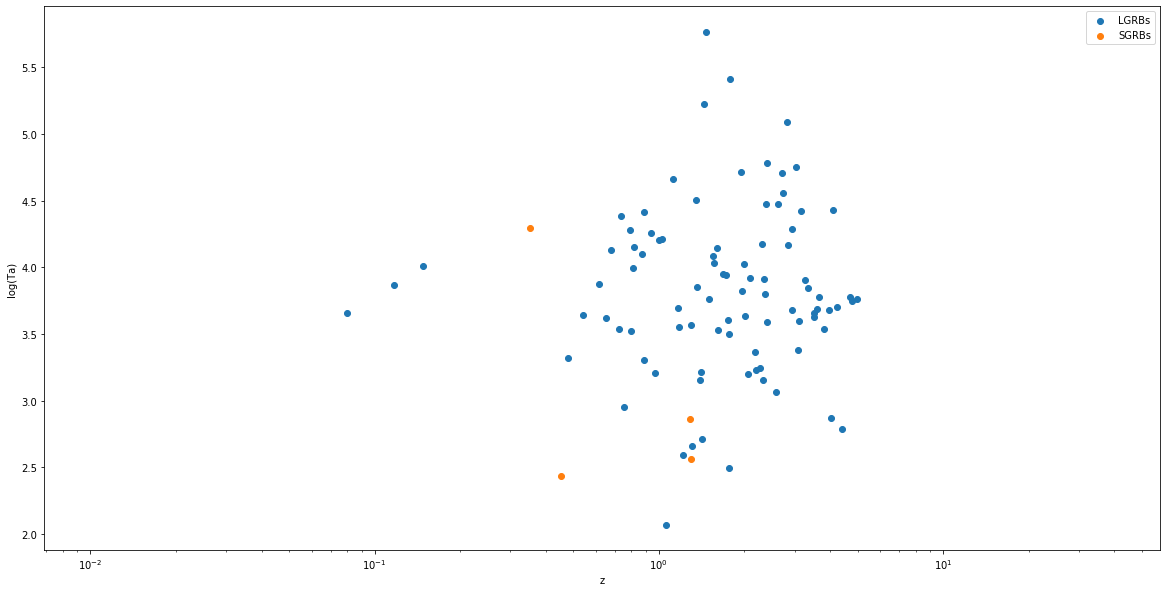

In [72]:
plt.figure(figsize=(20,10)) #sets figure size
ax = plt.gca()
ax.set_xscale('log')

plt.scatter(LGRBs['z'], LGRBs['logTa_best'])
plt.scatter(SGRBs['z'], SGRBs['logTa_best'])

plt.xlabel('z')
plt.ylabel('log(Ta)')
plt.legend(['LGRBs','SGRBs'])
plt.show()

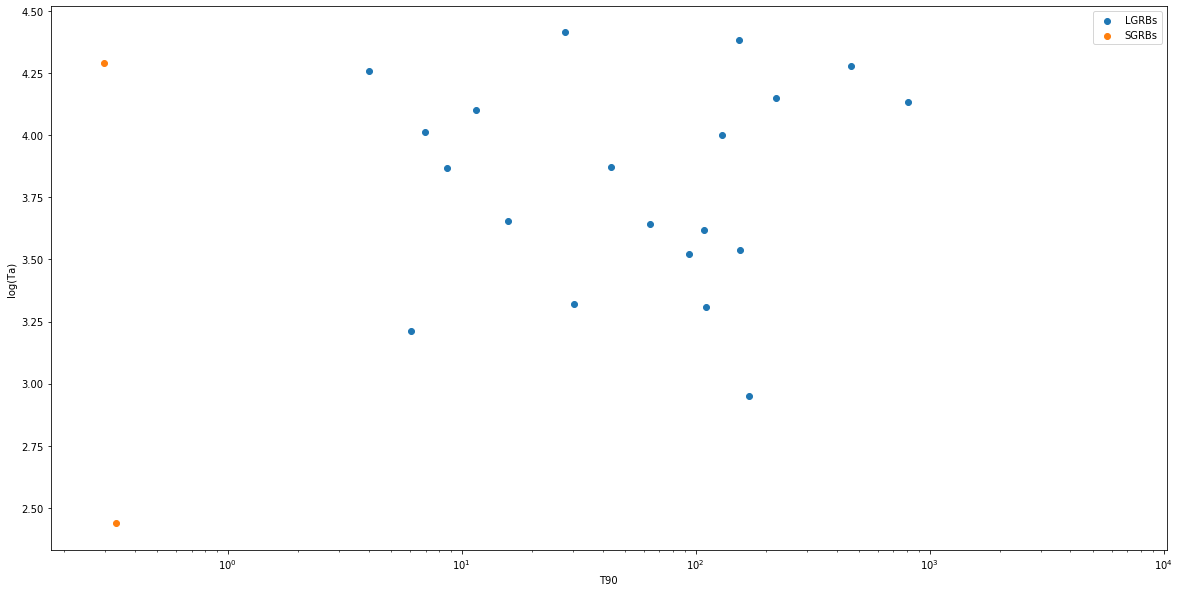

In [74]:
plt.figure(figsize=(20,10)) #sets figure size
ax = plt.gca()
ax.set_xscale('log')

plt.scatter(LGRBs_lowz['T90'], LGRBs_lowz['logTa_best'])
plt.scatter(SGRBs_lowz['T90'], SGRBs_lowz['logTa_best'])

plt.xlabel('T90')
plt.ylabel('log(Ta)')
plt.legend(['LGRBs','SGRBs'])
plt.show()